<a href="https://colab.research.google.com/github/udoli3/AIFFEL_quest/blob/main/KerasQuest/MainQuest3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전설의 포켓몬 구분하기

데이터셋: Pokemon.csv 데이터셋 (캐글)

태스크: 분류 (전설의 포켓몬, 일반 포켓몬 분류)

데이터셋 형태:
11개 특성

```
#: ID for each pokemon
Name: Name of each pokemon
Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
Type 2: Some pokemon are dual type and have 2
Total: sum of all stats that come after this, a general guide to how strong a pokemon is
HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
Attack: the base modifier for normal attacks (eg. Scratch, Punch)
Defense: the base damage resistance against normal attacks
SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
SP Def: the base damage resistance against special attacks
Speed: determines which pokemon attacks first each round
```

### __사용될 라이브러리__

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


###__데이터셋 읽어오고 구분해 저장하기__

* 이하 생성된 변수:
  * legendary 레전더리 특성이 True인 (데이터포인트들이 저장된) 데이터프레임
  * ordinary 레전더리 특성이 False인 (데이터포인트들이 저장된) 데이터프레임

#####original_data에 포켓몬 데이터 저장하기

###### 1. 로컬 드라이브에 파일 넣어 이용

In [138]:
from google.colab import drive
# 드라이브 마운트
drive.mount('/content/gdrive')

# 로컬 경로
file_path = '/content/Pokemon.csv'
original_data = pd.read_csv(file_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


메모

* 클라우드쉘:
```
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
```

* csv로 불러오는 방법과의 차이는 뭘까 (데이터 사용에 있어서)

###### (미완성) 2.구글 클라우드 스토리지 경로 (GCS (Google Cloud Storage) PATH) 이용하기

캐글 노트북에서 GCS 경로를 받고 다음 진행

In [139]:
# 경로 불러오기 위해 설치
# !pip install gcsfs

In [140]:
# GCS_DS_PATH = ''

#####변수에 데이터 저장하고 pandas로 나타내기

원본 데이터를 훼손하지 않고 여러 시도를 하기 위함.

In [141]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#####데이터 구분하기

목표: Legendary (전설의 포켓몬인지 아닌지의) 여부 판단

* 레전드 포켓몬 데이터셋: Legendary == True 값을 가짐 --> legendary 변수에 저장
* 일반 포켓몬 데이터셋: Legendary == False 값을 가짐 --> ordinary 변수에 저장

In [142]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [143]:
# Q. 일반 포켓몬의 데이터셋도 만들어봅시다.
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=False)
print(ordinary.shape)
ordinary.head()

(735, 14)


,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


###__데이터 확인하기__

* 전체적으로 확인
  * 결측치 확인
* 특성별로 확인
  * 포켓몬 종 수 확인
  * 속성 가지수 확인
    * 속성 결측치 확인
* 불균형 데이터의 데이터 분포 확인 (그래프)



---
* 이하 생성된 변수:
  * types 속성 종류 리스트
  * stats 스탯 종류 리스트

#####__데이터 전체적으로 확인하기__

######결측치 확인

In [144]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

두 번 째 속성이 없는 포켓몬이 있다 (386종)

######전체 특성(feature, 칼럼) 확인

In [145]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

* 13개 특성
* 형태: 객체

######(미완성)dtype 확인

source: AIFFEL
```
# : 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. int
Name : 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) str
Type 1 : 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. str
Type 2 : 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. str
Total : 전체 6가지 스탯의 총합. int
HP : 포켓몬의 체력. int
Attack : 물리 공격력. (scratch, punch 등) int
Defense : 물리 공격에 대한 방어력. int
Sp. Atk : 특수 공격력. (fire blast, bubble beam 등) int
Sp. Def : 특수 공격에 대한 방어력. int
Speed : 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) int
Generation : 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. int
Legendary : 전설의 포켓몬 여부. !! Target feature !! bool
```

#####__데이터 특성별 확인하기1__

######아이디 컬럼

In [146]:
# '#' 컬럼 길이
len(set(pokemon["#"]))
# #컬럼 집합 길이

721

In [147]:
pokemon[pokemon["#"] == 6]
# 포켓몬 확인[포켓몬중 #컬럼 확인해서 그게 6이라면]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


* 동일 아이디 다수

* 동일 아이디 하위 정보:
  * 진화 종
  * 버전 (X, Y)

######총 몇 종류? 이름 컬럼

In [148]:
len(set(pokemon["Name"]))

800

###### 총 몇 개 속성? 속성 칼럼

In [149]:
# 무작위 확인
pokemon.loc[[6, 10]]
# 인덱스 순서상 6번째, 10번째 데이터 포인트의 데이터

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


__속성에 해당하는 두 컬럼 길이 확인__

In [150]:
len(set(pokemon["Type 1"])), len(set(pokemon["Type 2"]))

(18, 19)

In [151]:
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

* 제 1속성: 18가지
* 제 2속성: 19가지

메모

* 왜 리스트로 확인했을까

__차이 확인: 집합간 차이나는 요소 확인하기__

In [152]:
# 집합간 차이나는 요소로 확인
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

* NaN 값. 속성2는 선택사항이므로 결측치 범주가 마련돼있다.

###### * 속성 별도 저장

In [153]:
# types 변수에 속성 집합 리스트 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Dragon', 'Rock', 'Fighting', 'Dark', 'Steel', 'Electric', 'Bug', 'Fairy', 'Ice', 'Fire', 'Grass', 'Ground', 'Psychic', 'Ghost', 'Flying', 'Poison', 'Normal', 'Water']


######속성이 하나뿐인 (속성2는 NaN인) 종 몇 개?

In [154]:
# 속성2 결측치 개수 확인
pokemon["Type 2"].isna().sum()
# sum()으로 내용 아닌 개수 확인

386

* 전체 데이터의 결측치와 동일.

#####__불균형 데이터의 데이터 분포 확인__ (그래프, 테이블)

* Legendary == True 와 Lengendary == False 간 데이터 불균형

* 그래프, 테이블 확인
  * 속성1
  * 속성2

######그래프

* plt의 subplot으로 두 개의 그래프를 한 번에 그릴 수 있다
* sns 의 countplot으로 그래프를 그릴 수 있다 (데이터의 개수를 표시할 수 있다)

__속성1__

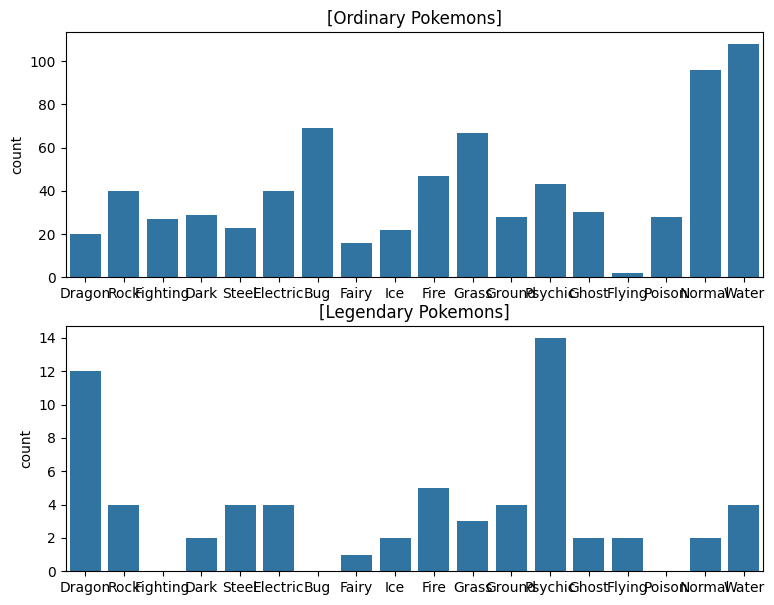

In [155]:
# 그래프 크기 지정
plt.figure(figsize=(9, 7))  # 화면 해상도에 따라 그래프 크기 조정 가능

# 그래프 그리기
# 일반
plt.subplot(211)  # 2행 1열의 첫 번째 그래프
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')  # ordinary 데이터셋 중 "Type 1"컬럼을 축에 지정 | 속성 리스트 순서대로 | x축 레이블 없애기
plt.title("[Ordinary Pokemons]")  # 그래프 제목

# 레전드
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

* 분포 가장 높은 두 속성:
  * 일반: Normal, Water
  * 레전드: Psychic, Dragon

__속성2__

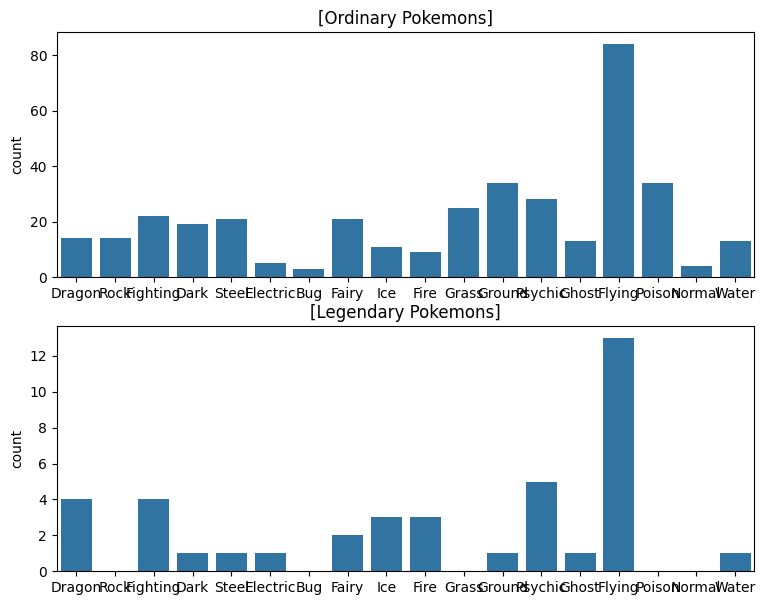

In [156]:
plt.figure(figsize=(9, 7))

# 일반
plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")
# 레전드
plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

일반, 레전드 공통
* 선택적 속성으로 가장 빈번한 속성: Flying
* 선택적 속성으로 비교적 희귀한 속성: Bug, Normal

일반, 레전드 차이
* 일반에서는 상대적으로 많으나 레전드에는 없음: Rock, Grass, Poision



######테이블(피벗)

* 피벗 테이블은 데이터셋, 컬럼(인덱스로 지정), 값(해당 데이터)로 구성할 수 있다

__속성1__

In [157]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


__속성2__

In [158]:
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


#####__데이터 특성별 확인하기2__ (태스크 연관 데이터 검토, 그래프)

######스탯컬럼

In [159]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

######[데이터 검토]
스탯확인 (임의의 포켓몬)

total 과 stat의 총합 일치 여부 확인

In [160]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


* 일치함

######전체 포켓몬 대상으로 total과 stat의 총합 일치여부 확인

In [161]:
c = (pokemon['Total'].values == pokemon[stats].values.sum(axis=1)).sum()
print(c)

800


* 모두 일치

######__Total 값에 따른 분포 확인__ (그래프)

* 모든 포켓몬 Total 스탯 수치 비교 (분포도)
* 일반, 레전더리 색 차별

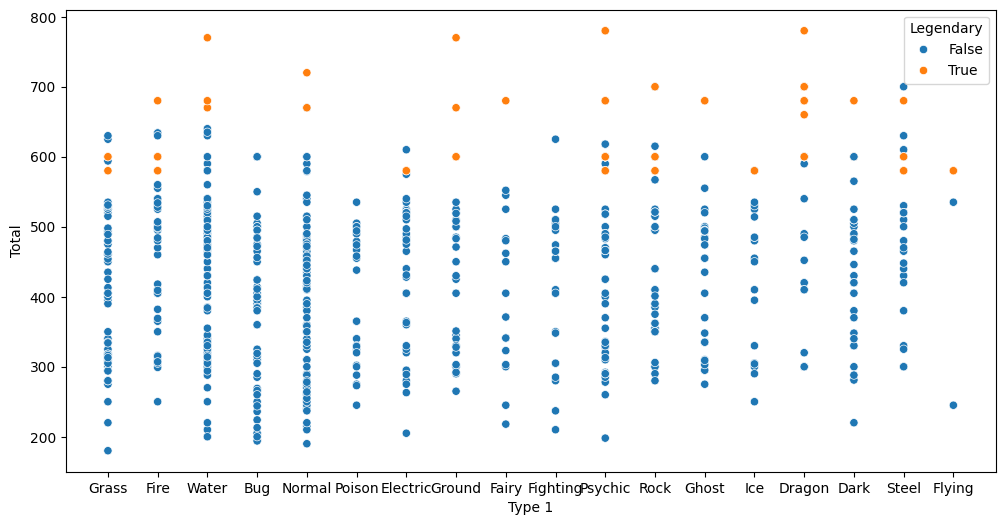

In [162]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)  # 화면 해상도에 따라 그래프 크기를 조정 가능

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary") # 레전더리라면 색 지정
plt.show()

* 전설의 포켓몬 stat 값이 높다.

__각 스탯값 및 분포도 확인__

* subplot 그리드를 생성해서 여러개의 scatter plot을 한 번에 표시할 수 있다.
  * 그리드를 생성할 때 서브플롯을 변수에 할당하되 행별로 튜플로 묶어주고, 동시에 행 열 지정할 수 있다.

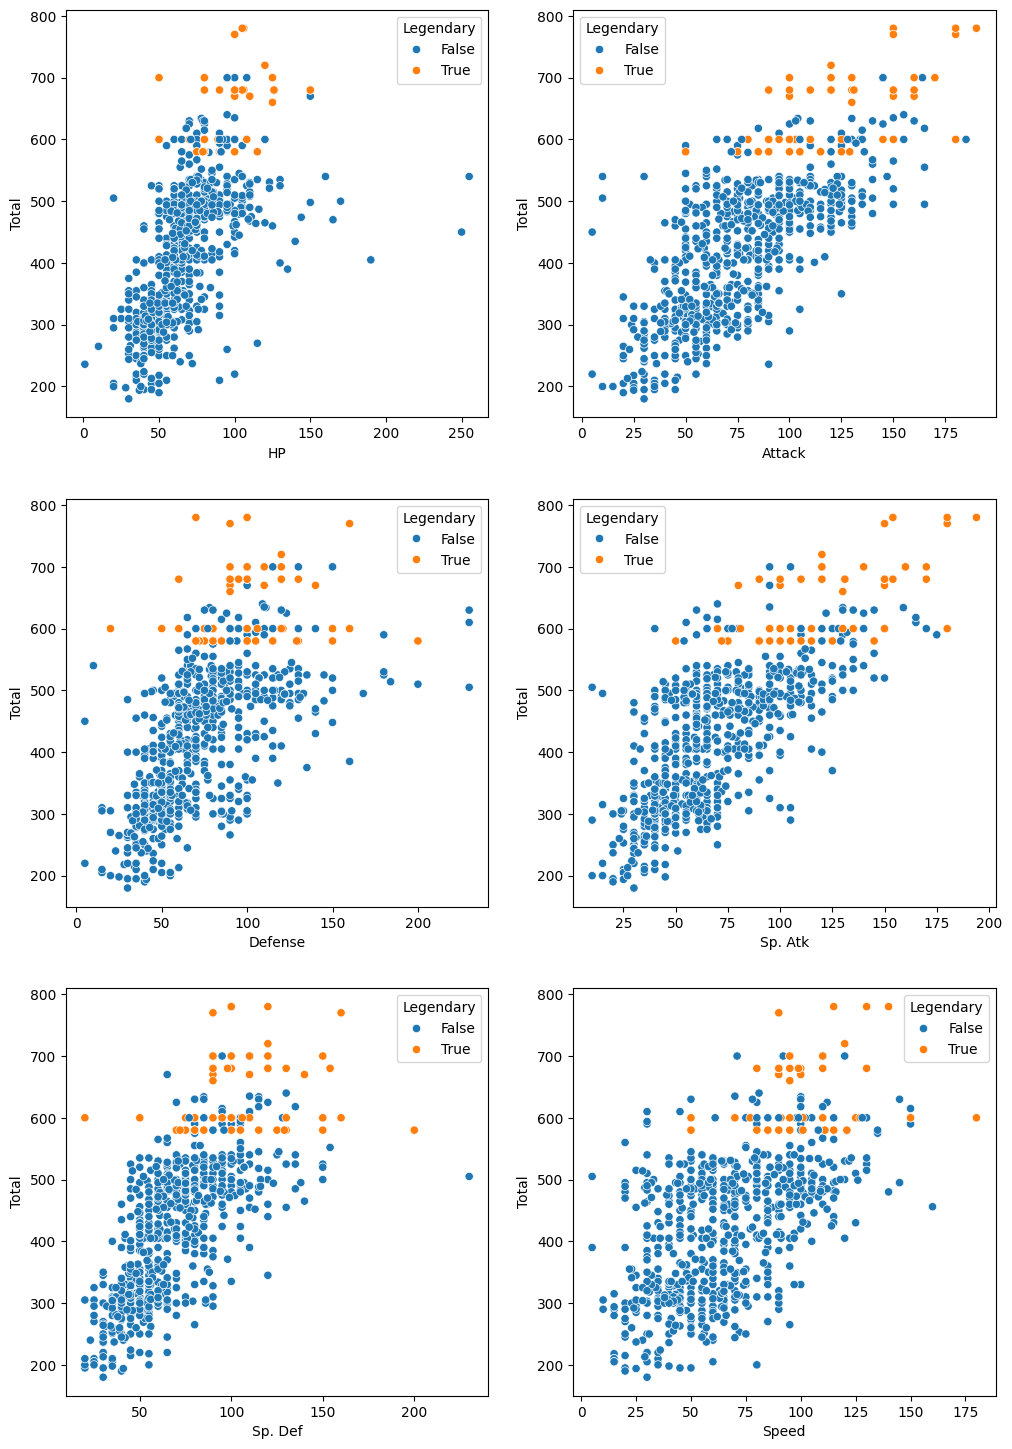

In [163]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)  # 3행 2열의 subplot 그리드 생성, 괄호로 한 행에 들어갈 자리 변수를 묶어줌 (각 서브플롯을 변수에 할당)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기 조정 가능

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

* 레전드 포켓몬이 압도적인 (Total과 비례하는) 영역은 공격력, 스페셜 공격력, 속도
* 방어, HP는 오히려 일반이 더 높기도 함

######__세대별 레전드 포켓몬 몇 종? 포켓몬 수 확인__ (그래프)

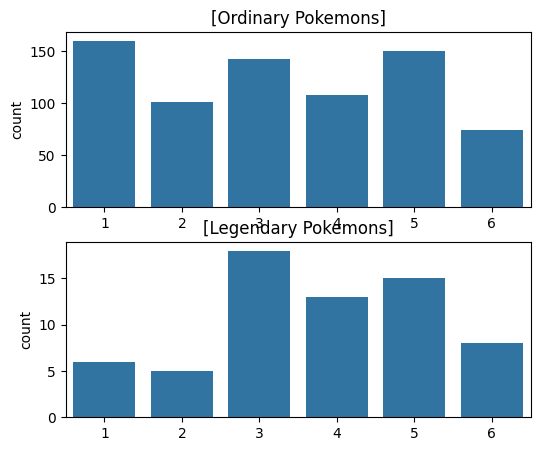

In [164]:
plt.figure(figsize=(6, 5))   # 화면 해상도에 따라 그래프 크기 조정 가능

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('') # x축 레이블 없애기
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

* 레전드 포켓몬 3,4,5세대에 급증

###__Legendary Ordinary 분리해서 분석하기__

Total, 이름에 레전드 포켓몬 고유 특징이 있다.

####__Total 값에 따른 비교__

레전드 포켓몬, 일반 포켓몬 모두
* 스탯통합(Total)에 따른 그래프
* 동일한 스탯총합을 공유하는 종의 수 평균

#####Q: 전설의 포켓몬이 가지는 Total 값은 다양하지 않고 9가지로 분류된다. <- 이게 왜 중요한가?

#####__Legendary__

######전설의 포켓몬 속성 값이 따른 Total

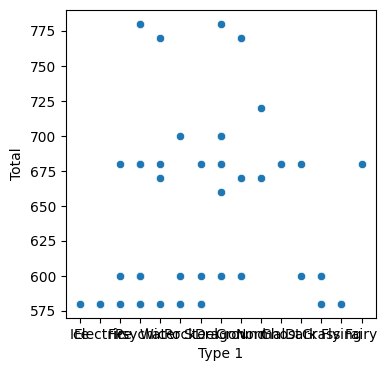

In [165]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 4)

sns.scatterplot(data=legendary, x="Type 1", y="Total")
plt.show()

######Total 값에 따른 전설의 포켓몬 속성 (축 전환 및 특이점)

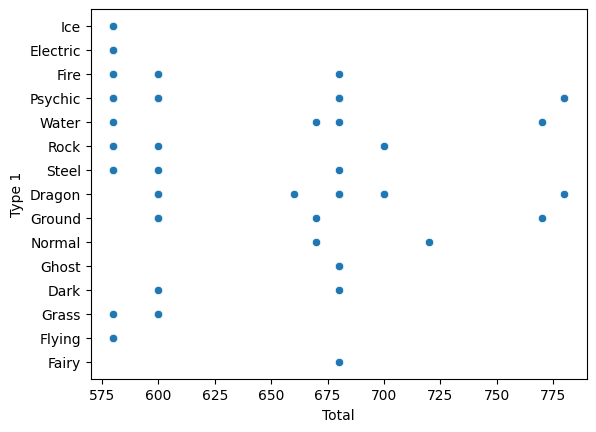

In [166]:
# 축을 바꿔서 수치 간격을 늘려봄
fig.set_size_inches(10, 4)
sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

사실 확인 (실제로 값이 일정 숫자로 분포되어 있을까?)

In [167]:
# 리스트가 짧은가? (실제로 값이 10개 남짓 숫자일까?)
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


* Yes. Total 값 9개 존재

(동일 내용) 그래프로 확인

###### Total 값에 따른 포켓몬 종 수

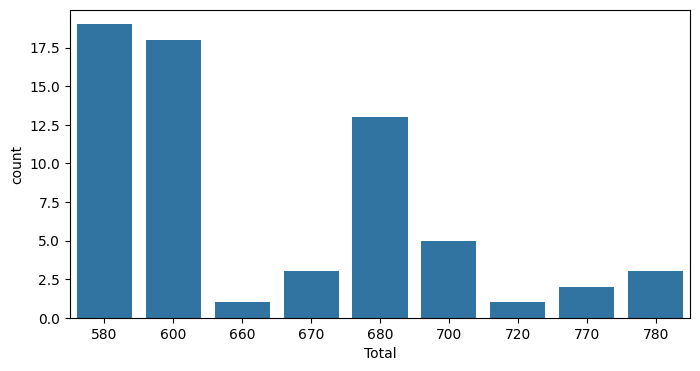

In [168]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [169]:
round(65 / 9, 2)  # 소수점 둘째 자리까지 반올림

7.22

* 평균 7.22 종이 동일한 스탯총합을 가짐

#####__Ordinary__

######Total 값에 따른 전설의 포켓몬 속성

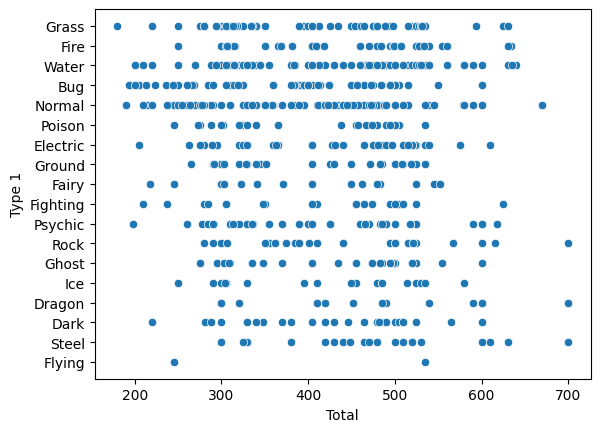

In [170]:
fig.set_size_inches(10, 4)
sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

* 지속성 확인됨.


###### Total 값에 따른 포켓몬 종 수

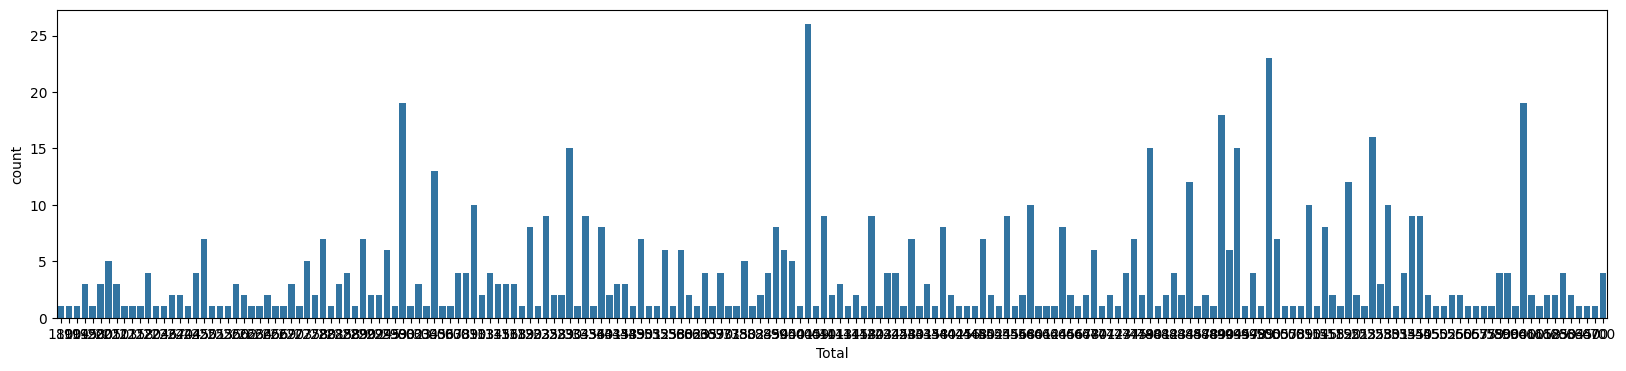

In [171]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 4)

sns.countplot(data=ordinary, x="Total")
plt.show()

######동일한 스탯총합을 가진 종 수 평균 확인

집합의 크기 확인하기

In [172]:
# 요소 확인해보기
print(sorted(set(ordinary["Total"])))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


In [173]:
len(sorted(set(ordinary["Total"])))

195

* 195개 값으로 분포됨.


In [174]:
round((800 - 65) / 195, 2)  # 소수점 둘째 자리까지 반올림

3.77

* 평균 3.77 종이 동일한 스탯총합을 가짐

#####__Legendary에게 고유한 Total 값이 있는지 확인__

In [175]:
# 교집합 구하기
intersection = set(legendary["Total"]).intersection(ordinary["Total"])
print('교집합 : ', intersection, '\n')

print('전설의 포켓몬 고유 Total : ')
set(legendary["Total"]) - intersection

# set(ordinary["Total"] == 660)

교집합 :  {600, 700, 670, 580} 

전설의 포켓몬 고유 Total : 


{660, 680, 720, 770, 780}

##### A: 이런 확인이 왜 중요했나?
* 특정 포켓몬의 스탯총합이 (전설의 포켓몬의 스탯총합 리스트) 9가지에 포함되는가 <-- 전설의 포켓몬 판단의 유효 지표
  * 그 중 일부는 그 자체로 전설의 포켓몬 확정 가능 (660, 680, 720, 770, 780)은 legendary 고유 Total

####__이름 확인__

이름의 특징:
* 레전드 (가능성 높음):
  * 비슷한 이름
  * ~ forme 이름
  * 긴 이름

---

이하 생성된 변수:
* name_count 이름의 길이 리스트 (데이터프레임에 특성 추가)

######비슷한 이름을 가진 포켓몬들

In [176]:
legendary[3:6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [177]:
legendary[14:24]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
14,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
15,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
16,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
17,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
18,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
19,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
20,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True
21,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
22,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True
23,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


In [178]:
legendary[25:29]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
25,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
26,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
27,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
28,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


In [179]:
legendary[46:50]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
46,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
47,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
48,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
49,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True


In [180]:
legendary[52:57]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
52,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
53,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True
54,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True
55,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
56,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True


######비슷한 이름 가진 포켓몬들 한 프레임으로 보기

In [181]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57] # 비슷한 이름을 가진 포켓몬들
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)  # 데이터프레임으로 변환, 합치기
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


######또 다른 종류의 비슷한 이름 (-forme)

In [182]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


######이름 길이 칼럼 생성

In [183]:
# legendary에 컬럼 추가
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [184]:
# ordinary에 컬럼 추가
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))
ordinary.head()

,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


######__이름 길이 컬럼 특징__ (그래프)

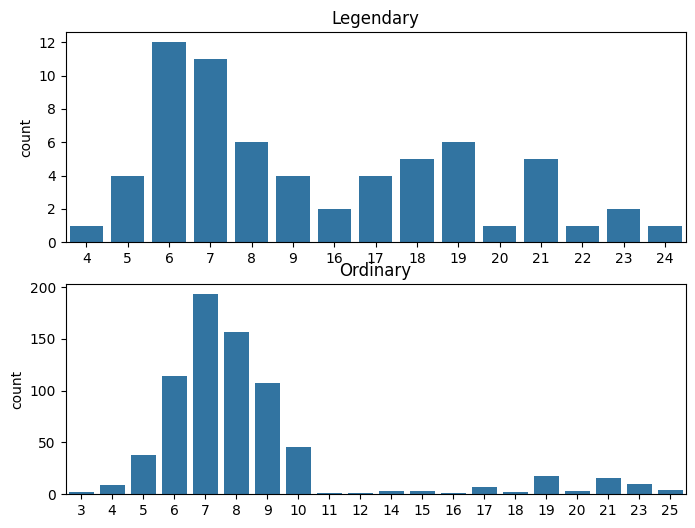

In [185]:
plt.figure(figsize=(8, 6))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")

plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

######이름 길이 10 이상일 확률

In [186]:
# 전설의 포켓몬
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [187]:
# 일반 포켓몬
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


### __데이터 전처리__

####데이터프레임 업데이트

#####이름 길이

(유용할지 모르나 미리 준비)

In [188]:
# name_count 컬럼 추가 : 이름 컬럼 값의 길이 저장
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [189]:
# long_name 컬럼 추가 : 이름 길이가 10 이상이면 True
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


#####이름 토큰 추출 (높은 빈도수)

###### isalpha 전체 True 만들기
(특수문자 제거하기 <--이를 위한 임시 공백 제거 컬럼 생성)
  * 공백 제거 컬럼 준비 (isalpha 사용 위함. isalpha 함수는 특수문자와 공백 모두 False처리)
  * isalpha 적용
  * 특수문자 확인
  * 특수문자 전체 알파벳으로 치환
    * 치환 후 다시 공백 제거, isalpha 적용

In [190]:
# 공백 제거
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [191]:
# isalpha 적용
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [192]:
# 특수문자 확인
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [193]:
# 특수문자 전체 알파벳으로 치환
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

# 데이터가 적으므로 하드코딩

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [194]:
# 공백 제거 컬럼 업데이트, isalpha 업데이트
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(0, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


* 특수문자와 공백 모두 제거됨

######토큰화 (정규식)

정규식 패키지 re 활용해 토큰화 진행

목표 토큰 형태: 대문자 하나+소문자n개

In [195]:
import re

토큰화 예시

In [196]:
name = "CharizardMega Charizard X" #임의의 이름
# 공백 기준으로 분리
name_split = name.split(" ")
name_split
#분리된 것 중 첫 인덱스 값만 저장
temp = name_split[0]
temp
# 정규식 활용해 원하는 유형으로 토큰화 (변수에 저장된 문자열 중 지정 정규식에 해당하는 부분 찾기)
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

* 정규식 ``` '[A-Z][a-z]*' ```
  * A ~ Z 중 하나로 시작, 그 이후는 [a ~ z] 중에 있다면 전부

이름 컬럼에 적용

In [197]:
# 토큰화를 적용하는 함수 정의
def tokenize(name):
    name_split = name.split(" ")
    temp = name_split[0]
    tokens = re.findall('[A-Z][a-z]*', temp)

    return np.array(tokens)

In [198]:
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

60
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'Mega', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latios', 'Latios', 'Mega', 'Kyogre', 'Kyogre', 'Primal', 'Groudon', 'Groudon', 'Primal', 'Rayquaza', 'Rayquaza', 'Mega', 'Jirachi', 'Deoxys', 'Normal', 'Deoxys', 'Attack', 'Deoxys', 'Defense', 'Deoxys', 'Speed', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Giratina', 'Origin', 'Darkrai', 'Shaymin', 'Land', 'Shaymin', 'Sky', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Tornadus', 'Therian', 'Thundurus', 'Incarnate', 'Thundurus', 'Therian', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Landorus', 'Therian', 'Kyurem', 'Kyurem', 'Black', 'Kyurem', 'White', 'Xerneas', 'Yveltal', 'Zygarde', 'Diancie', 'Diancie', 'Mega', 'Hoopa', 'Hoopa', 'Hoopa', 'Hoopa', 'Volcanion']


* 왜 60개지?

######카운터

In [199]:
from collections import Counter

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound,True


### (### 템플릿)

#### (#### 템플릿)

#####(##### 템플릿)

###### (###### 템플릿)

## 기록

######질문

* Q1: dtype 확인하기
* Q2: 왜 리스트로?
* Q3: 왜 계속 x축 레이블을 없애지?
* Q4: 정규화 이후, 토큰 개수 왜 60개지?

* Q+: 그래프 색상을 다르게 하는 클라우드 주피터와 코랩 노트북의 차이는?

###### 회고

배운 점
* (미완성) 코랩으로 데이터를 불러오는 2가지 방법 (실행 완료)
* 데이터 확인
  * 데이터에 특성에 따라 계획적으로 결측치를 조사한다
  * 필요에 따라 변수에 데이터 부분 저장
  * 태스크 해결 기준이 될 데이터 특성을 파악한다
* 그래프
  * plt의 subplot으로 두 개의 그래프를 한 번에 그릴 수 있다
  * sns 의 countplot으로 그래프를 그릴 수 있다 (데이터의 개수를 표시할 수 있다)
  * subplot 그리드를 생성해서 여러개의 scatter plot을 한 번에 표시할 수 있다.
    * 그리드를 생성할 때 서브플롯을 변수에 할당하되 행별로 튜플로 묶어주고, 동시에 행 열 지정할 수 있다.
* 정규식
  * re 패키지
  * a.b == a로 시작 b로 끝나는 모든 문자열
      * a.b == a ~ ~ ~ b
